/tmp/ipython-input-3-3978980066.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2023-01-01", end="2025-05-01")
[*********************100%***********************]  1 of 1 completed


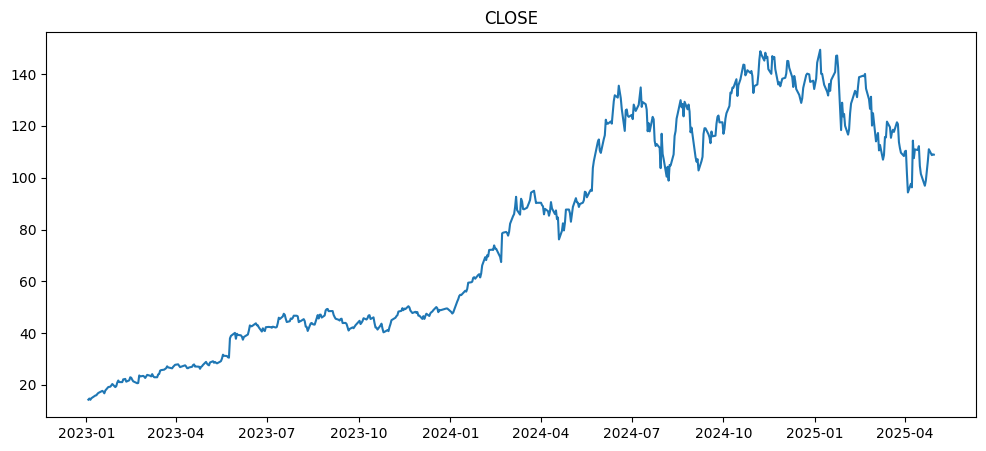

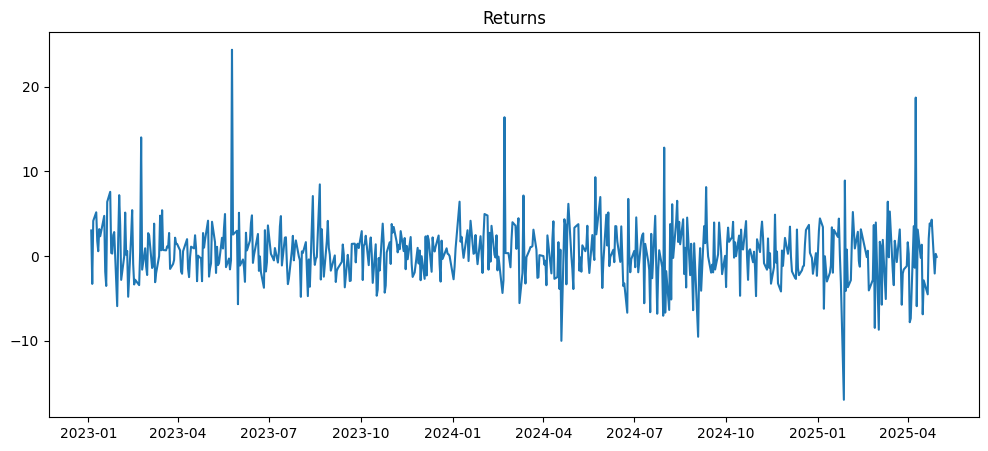

Stationarity Tests for Returns^2:
ADF Test: Stat=-23.2989, p-value=0.0000
KPSS Test: Stat=0.2259, p-value=0.1000


/tmp/ipython-input-3-3978980066.py:34: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(series, regression='c')


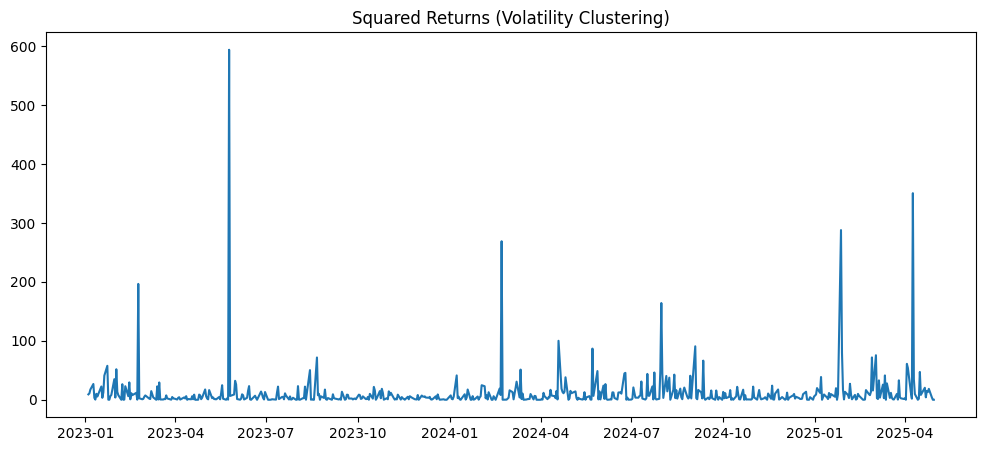

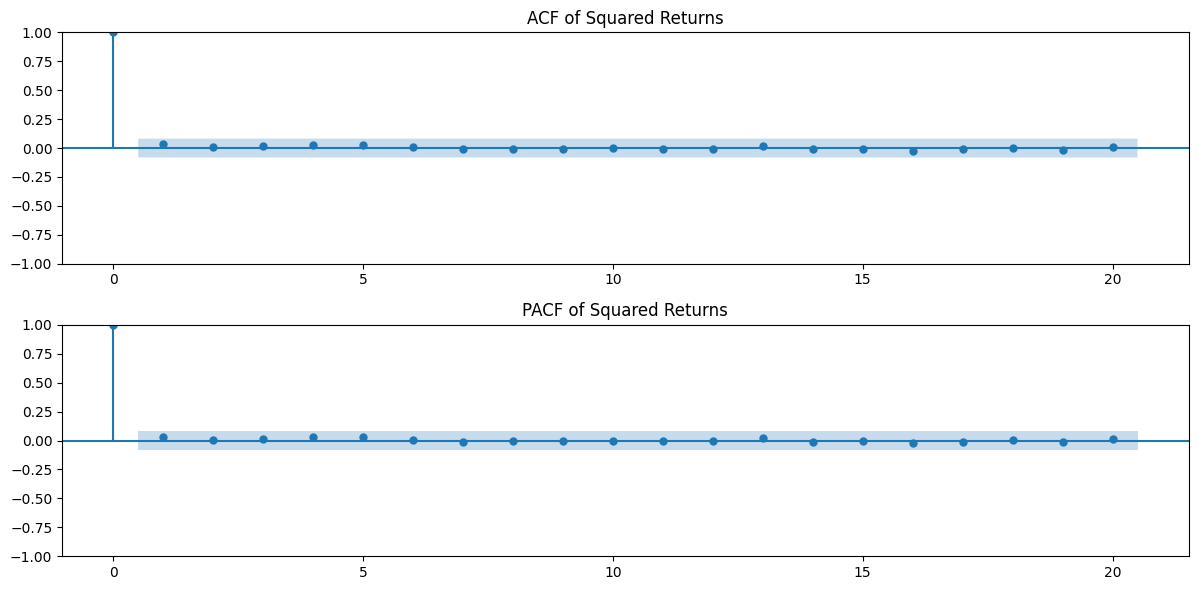

Iteration:      5,   Func. Count:     32,   Neg. LLF: 1535.3125646229619
Iteration:     10,   Func. Count:     56,   Neg. LLF: 1535.2728628865034
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1535.2728628867612
            Iterations: 10
            Function evaluations: 56
            Gradient evaluations: 10
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   NVDA   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1535.27
Distribution:                  Normal   AIC:                           3078.55
Method:            Maximum Likelihood   BIC:                           3096.01
                                        No. Observations:                  582
Date:                Mon, Jun 30 2025   Df Residuals:                      581
Time:       

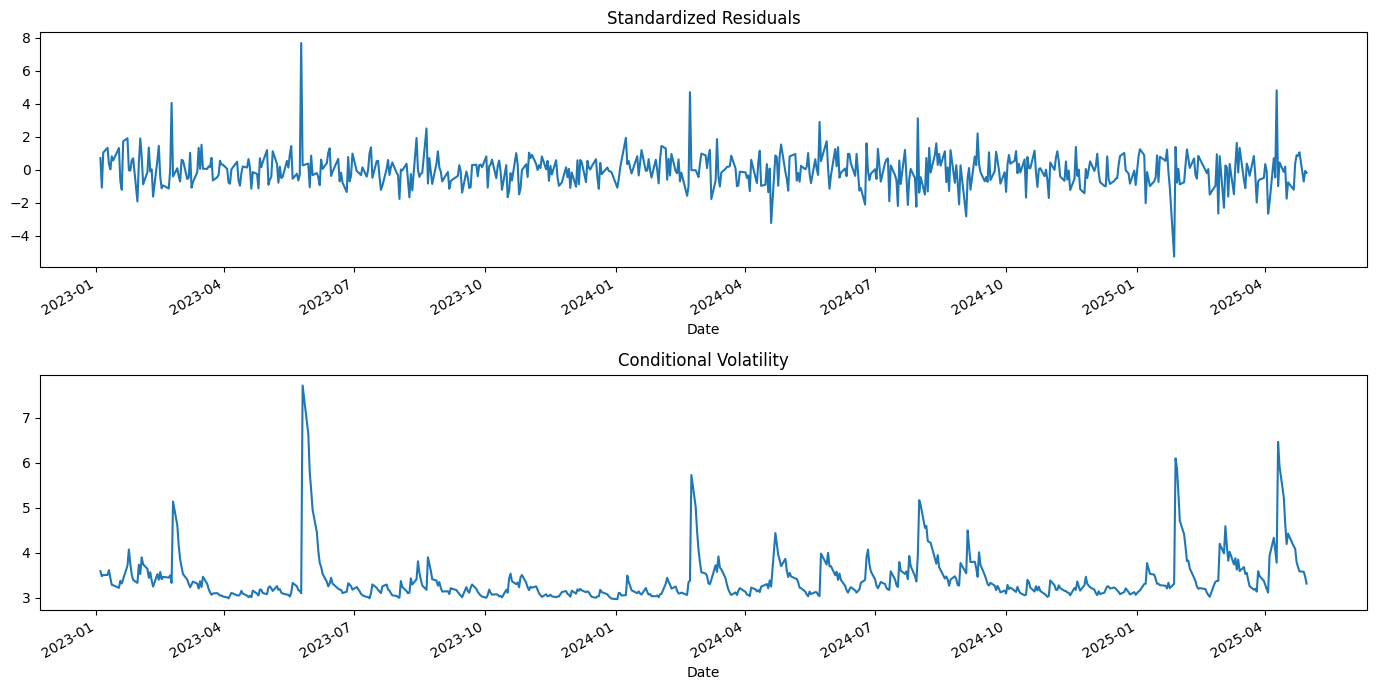


Jarque-Bera Test: Stat=1932.57, p-value=0.0000
Ljung-Box Test (squared residuals): Stat=0.87, p-value=0.9999

5-Day Volatility Forecast:
                  h.1        h.2        h.3        h.4        h.5
Date                                                             
2025-04-30  10.294682  10.677637  10.975024  11.205963  11.385301


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install arch
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss

# 1. Download NVIDIA data
ticker = "NVDA"
data = yf.download(ticker, start="2023-01-01", end="2025-05-01")
returns = 100 * data['Close'].pct_change().dropna()

# 2. Plot price and returns
plt.figure(figsize=(12, 5))
plt.plot(data['Close'])
plt.title('CLOSE')
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(returns)
plt.title('Returns')
plt.show()


# 3. Stationarity tests
def print_stationarity_tests(series):
    # ADF Test
    adf = adfuller(series)
    print(f"ADF Test: Stat={adf[0]:.4f}, p-value={adf[1]:.4f}")

    # KPSS Test
    kpss_test = kpss(series, regression='c')
    print(f"KPSS Test: Stat={kpss_test[0]:.4f}, p-value={kpss_test[1]:.4f}")

print("Stationarity Tests for Returns^2:")
print_stationarity_tests(returns**2)

# 4. Volatility clustering visualization
plt.figure(figsize=(12, 5))
plt.plot(returns**2)
plt.title('Squared Returns (Volatility Clustering)')
plt.show()

# 5. ACF/PACF of squared returns
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(returns**2, ax=plt.gca(), lags=20, title='ACF of Squared Returns')
plt.subplot(212)
plot_pacf(returns**2, ax=plt.gca(), lags=20, title='PACF of Squared Returns')
plt.tight_layout()
plt.show()

# 6. Fit ARCH model
model = arch_model(returns, vol='GARCH', p=1, q=1)
results = model.fit(update_freq=5)
print(results.summary())

# 7. Plot standardized residuals and conditional volatility
plt.figure(figsize=(14, 7))
plt.subplot(211)
results.std_resid.plot(title='Standardized Residuals')
plt.subplot(212)
results.conditional_volatility.plot(title='Conditional Volatility')
plt.tight_layout()
plt.show()

# 8. Model diagnostics
# Residual normality test
from scipy.stats import jarque_bera
jb_test = jarque_bera(results.std_resid)
print(f"\nJarque-Bera Test: Stat={jb_test[0]:.2f}, p-value={jb_test[1]:.4f}")

# Ljung-Box test on squared residuals
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test = acorr_ljungbox(results.std_resid**2, lags=[10])
# Accessing p-value using lag value 10 as index
print(f"Ljung-Box Test (squared residuals): Stat={lb_test.lb_stat[10]:.2f}, p-value={lb_test.lb_pvalue[10]:.4f}")

# 9. Forecast volatility
forecasts = results.forecast(horizon=5)
print("\n5-Day Volatility Forecast:")
print(forecasts.variance.iloc[-1:])

